In [5]:
#Multiple Linear Regression
#uses a combination of factors to get a more accurate prediction.
#y=[m1x1+m2x2+...+mnxn]+c
import pandas as pd
dataset=pd.read_csv(r"D:\Downloads\archive\Student_Performance.csv")
dataset.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
dataset.drop(columns=["Extracurricular Activities"],inplace=True)
dataset.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0


<Figure size 700x700 with 0 Axes>

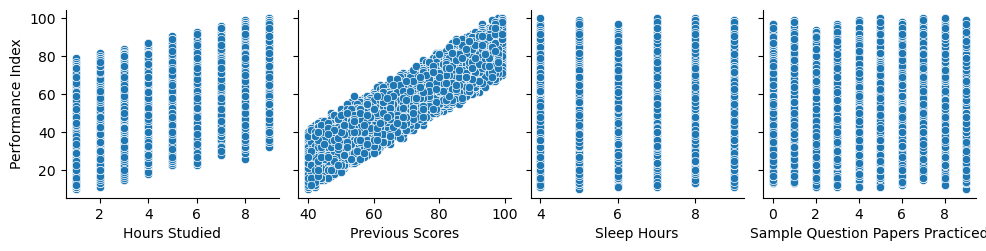

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
sns.pairplot(dataset,x_vars=["Hours Studied","Previous Scores","Sleep Hours","Sample Question Papers Practiced"],
             y_vars="Performance Index")
plt.show()

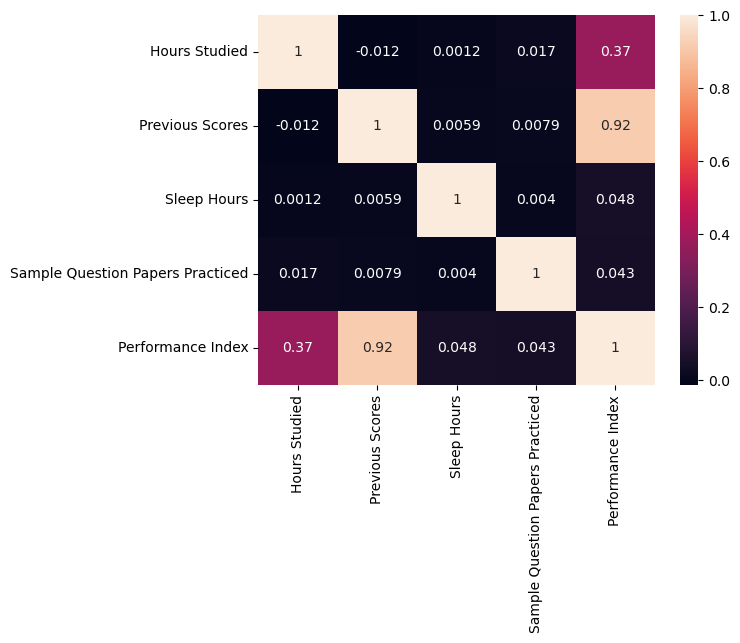

In [16]:
#checking linear relationship using correlation
#annot gives the degree of correlation
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [20]:
input_data=dataset.iloc[:,:-1]
output_data=dataset["Performance Index"]
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(input_data,output_data, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.9887144552384186

In [28]:
y_pred=lr.predict(x_test)
print(y_pred[:5])

[55.00786377 22.31444624 47.59404705 30.97597184 43.31471122]


In [29]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

      Actual  Predicted
6252    51.0  55.007864
4684    20.0  22.314446
1731    46.0  47.594047
4742    28.0  30.975972
4521    41.0  43.314711


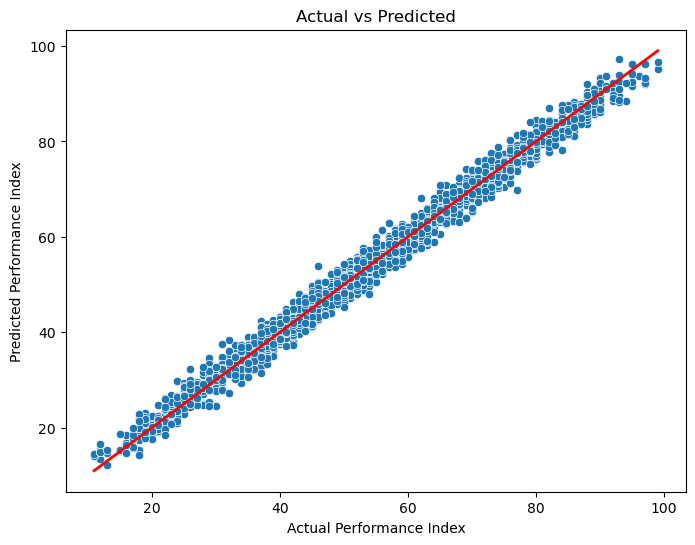

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
# Diagonal line representing perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs Predicted')
plt.show()